## Loading and Processing Data

In [2]:
"""
wget grabs data for you from the web server
"""
!wget https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip

--2021-04-08 08:49:39--  https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pan6mutc5xj5kj0/trainPart1.zip [following]
--2021-04-08 08:49:40--  https://www.dropbox.com/s/raw/pan6mutc5xj5kj0/trainPart1.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce603be6c828d956a3a6dbf3f7b.dl.dropboxusercontent.com/cd/0/inline/BMOXpiSJeXPrD9ZAd7pwOK7x275HvM-MJfugJtQuLwZqbSo0a-HP8-cblSQTH0ZiNtVxCTMkQ_QLHxzzO4xXpsPyxhTQPXBeopeBbv5eZyrf0RRTAF0ZL3IvY1mw7nhftBayLTR08SKDqxDGTwkJ2-Dk/file# [following]
--2021-04-08 08:49:40--  https://uce603be6c828d956a3a6dbf3f7b.dl.dropboxusercontent.com/cd/0/inline/BMOXpiSJeXPrD9ZAd7pwOK7x275HvM-MJfugJtQuLwZqbSo0a-HP8-cblSQTH0ZiNtVxCTMkQ_QLHxzzO4xX

In [ ]:
"""
Let's unzip the zip file downloaded above
"""

!unzip trainPart1.zip

#output for this shell is cleared as this return 2600 lines containing files and folder names inside above zip

In [4]:
"""
Let's change our working directory to "train",
The next step will be to rename existing file names to 0-9, A-Z, a-z
"""


import os # this module helps you in handling directories and file
os.chdir('/content/train')

In [5]:
"""
Here we are iterating inside the train folder and renaming current file names with class name using 
ASCII value of each character
"""

for i in range(1,63):
  if i<10:
    path='Sample00'+str(i)
    os.rename(path, str(i-1))
  if i==10:
    path='Sample0'+str(i)
    os.rename(path, str(i-1))
  elif 10<i<37:
    path='Sample0'+str(i)
    x =54+i;
    os.rename(path,chr(x))
  elif 36<i<63:
    path='Sample0'+str(i)
    x =60+i;
    os.rename(path,chr(x))


In [6]:
ls # listing all the directories and files inside the current working directory

0/  4/  8/  b/  d/  f/  h/  j/  l/  n/  p/  r/  t/  v/  x/  z/
1/  5/  9/  B/  D/  F/  H/  J/  L/  N/  P/  R/  T/  V/  X/  Z/
2/  6/  a/  c/  e/  g/  i/  k/  m/  o/  q/  s/  u/  w/  y/
3/  7/  A/  C/  E/  G/  I/  K/  M/  O/  Q/  S/  U/  W/  Y/


In [7]:
# Let's see some images of our dataset

In [8]:
import matplotlib.pyplot as plt
#this module helps in plotting data 

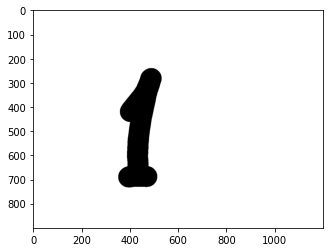

In [9]:
img=plt.imread('/content/train/1/img002-001.png')
plt.imshow(img,cmap=plt.cm.binary)

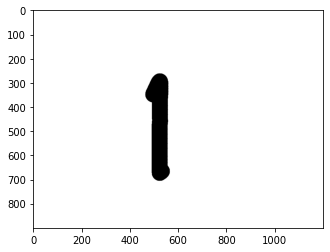

In [10]:
img=plt.imread('/content/train/1/img002-010.png')
plt.imshow(img,cmap=plt.cm.binary)

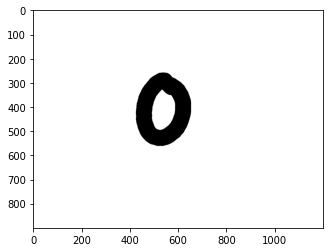

In [11]:
img=plt.imread('/content/train/0/img001-010.png')
plt.imshow(img,cmap=plt.cm.binary)

Looks like we got some good image dataset to train on.

In [12]:
from keras.preprocessing.image import ImageDataGenerator


"""
ImageDataGenerator is used for Image data augmentation in real-time but here it is used for rescaling and loading data.
flow_from_directory helps in resizing images and creating a batch that will be passed later to the model as input.
flow_from_directory automatically infers class label with the folder name.
"""



train_datagen = ImageDataGenerator(rescale = 1./255,  # rescaling the data(MIN-MAX Scaler)
                                   data_format='channels_last', # (Batch-Size, height, width, channels)
                                   validation_split=0.1) #for checking model's performance after every epoch

val_datagen = ImageDataGenerator(rescale = 1./255,
                                   data_format='channels_last',
                                   validation_split=0.1)


"""
The model will be trained only on data available and incase if model performance needs more data we will use augmentation techniques, 
but for now experimenting with the data we have is the first choice
"""

training_set = train_datagen.flow_from_directory('/content/train',  # directory of dataset
                                                 target_size = (64, 64), #output image size after loading
                                                 batch_size = 64,
                                                 class_mode = 'categorical', # we have 62 classes hence it's categorical
                                                 color_mode='grayscale',    
                                                 subset="training",
                                                 shuffle=True)

val_set = val_datagen.flow_from_directory('/content/train',
                                            target_size = (64,64),
                                            batch_size = 64,
                                            class_mode = 'categorical',
                                            color_mode='grayscale',
                                            subset="validation",
                                            shuffle=True)

Found 2232 images belonging to 62 classes.
Found 248 images belonging to 62 classes.


In [13]:
training_set.image_shape

#output from this generator will have shape of (batch_size,training_set.image_shape)

(64, 64, 1)

# Building Models for this subtask

In [14]:
# Impoting modules for model building, compiling and training

import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from keras.preprocessing.image import ImageDataGenerator


### 1. Building Simple Model 

In the very first step of building, a simple model is a priority.    
This lets you think deep how to create more advanced models for this
working dataset

In [15]:
def SimpleModel():

    model= keras.Sequential() #it's sequential model
    model.add(layers.Conv2D(64,3,input_shape=(64, 64, 1),activation='relu',kernel_initializer='HeUniform')) #adding convolution layer 
    model.add(layers.MaxPool2D(pool_size=(2,2),data_format="channels_last")) # maxpooing the previous layer
    model.add(layers.Dropout(rate=0.3)) #helps as a regularizer(weak)

    model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='HeUniform'))
    model.add(layers.MaxPool2D(pool_size=(2,2),data_format="channels_last"))
    model.add(layers.Dropout(rate=0.3))

    model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='HeUniform'))
    model.add(layers.MaxPool2D(pool_size=(2,2),data_format="channels_last"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=0.3))


    model.add(layers.Flatten())  # flattens everything form last layer

    model.add(layers.Dense(16,activation='relu',kernel_initializer='HeUniform')) #adding dense layer
    model.add(layers.BatchNormalization()) # Performing BatchNormalization on that
    model.add(layers.Dropout(rate=0.3))

    model.add(layers.Dense(62,activation='softmax')) #Output layer

    return model

In [16]:
first_model=SimpleModel()
first_model.summary() # Summarize all the layers with corresponing parameters to learn.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9

In [17]:
"""
Compiling model.
"""

first_model.compile(tf.keras.optimizers.Adam(learning_rate=0.009), #using adam optimizer
              loss=tf.keras.losses.CategoricalCrossentropy(), # we have multiclass-classification problem
              metrics=['accuracy']) #measures models performance


In [18]:
History=first_model.fit(training_set,epochs=100,verbose=1) # train model for 100 epochs

Epoch 1/100
35/35 [==============================] - 63s 887ms/step - loss: 4.3389 - accuracy: 0.0290
Epoch 2/100
35/35 [==============================] - 31s 896ms/step - loss: 4.1244 - accuracy: 0.0247
Epoch 3/100
35/35 [==============================] - 31s 899ms/step - loss: 3.7893 - accuracy: 0.0791
Epoch 4/100
35/35 [==============================] - 31s 897ms/step - loss: 3.4073 - accuracy: 0.1340
Epoch 5/100
35/35 [==============================] - 31s 896ms/step - loss: 3.0869 - accuracy: 0.1935
Epoch 6/100
35/35 [==============================] - 31s 896ms/step - loss: 2.8732 - accuracy: 0.2342
Epoch 7/100
35/35 [==============================] - 32s 904ms/step - loss: 2.5646 - accuracy: 0.3072
Epoch 8/100
35/35 [==============================] - 31s 899ms/step - loss: 2.3570 - accuracy: 0.3405
Epoch 9/100
35/35 [==============================] - 31s 898ms/step - loss: 2.1970 - accuracy: 0.3919
Epoch 10/100
35/35 [==============================] - 31s 889ms/step - loss: 2.095

In [19]:
"""
The loss was reducing up to a certain epoch, so training for more epochs would be beneficial if we change learning rate to a little small,
Reducing the learning rate now can lead to faster convergence,  Let's do this experiment and if fail will try to come up with something else.
"""


first_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

History1=first_model.fit(training_set,epochs=20,validation_data=val_set)

Epoch 1/20
35/35 [==============================] - 37s 1s/step - loss: 0.7152 - accuracy: 0.7595 - val_loss: 0.6216 - val_accuracy: 0.8105
Epoch 2/20
35/35 [==============================] - 35s 1s/step - loss: 0.7240 - accuracy: 0.7625 - val_loss: 0.6118 - val_accuracy: 0.8226
Epoch 3/20
35/35 [==============================] - 35s 999ms/step - loss: 0.7298 - accuracy: 0.7393 - val_loss: 0.6042 - val_accuracy: 0.8306
Epoch 4/20
35/35 [==============================] - 35s 993ms/step - loss: 0.7427 - accuracy: 0.7476 - val_loss: 0.5975 - val_accuracy: 0.8226
Epoch 5/20
35/35 [==============================] - 34s 982ms/step - loss: 0.7107 - accuracy: 0.7537 - val_loss: 0.6050 - val_accuracy: 0.8145
Epoch 6/20
35/35 [==============================] - 35s 992ms/step - loss: 0.7889 - accuracy: 0.7409 - val_loss: 0.6044 - val_accuracy: 0.8226
Epoch 7/20
35/35 [==============================] - 35s 991ms/step - loss: 0.6899 - accuracy: 0.7630 - val_loss: 0.5956 - val_accuracy: 0.8226
Epoch

In [20]:
first_model.compile(tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

History2=first_model.fit(training_set,epochs=5,validation_data=val_set)

Epoch 1/5
35/35 [==============================] - 37s 1s/step - loss: 0.7020 - accuracy: 0.7663 - val_loss: 0.5991 - val_accuracy: 0.8306
Epoch 2/5
35/35 [==============================] - 35s 992ms/step - loss: 0.6907 - accuracy: 0.7582 - val_loss: 0.5947 - val_accuracy: 0.8347
Epoch 3/5
35/35 [==============================] - 35s 991ms/step - loss: 0.6792 - accuracy: 0.7558 - val_loss: 0.5941 - val_accuracy: 0.8347
Epoch 4/5
35/35 [==============================] - 35s 994ms/step - loss: 0.6782 - accuracy: 0.7601 - val_loss: 0.5930 - val_accuracy: 0.8347
Epoch 5/5
35/35 [==============================] - 35s 1s/step - loss: 0.6650 - accuracy: 0.7697 - val_loss: 0.5912 - val_accuracy: 0.8347


In [21]:
"""
Passing complete dataset as a training set for more efficient performance,
We Will see how this model perform on testing data directly
"""


train_datagen = ImageDataGenerator(rescale = 1./255,  # rescaling the data(MIN-MAX Scaler)
                                   data_format='channels_last') # (Batch-Size, height, width, channels)

training_set = train_datagen.flow_from_directory('/content/train',  # directory of dataset
                                                 target_size = (64, 64), #output image size after loading
                                                 batch_size = 64,
                                                 class_mode = 'categorical', # we have 62 classes hence it's categorical
                                                 color_mode='grayscale',    
                                                 shuffle=True)

Found 2480 images belonging to 62 classes.


In [22]:
first_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

History3=first_model.fit(training_set,epochs=5)

Epoch 1/5
39/39 [==============================] - 36s 908ms/step - loss: 0.7686 - accuracy: 0.7375
Epoch 2/5
39/39 [==============================] - 35s 905ms/step - loss: 0.8216 - accuracy: 0.7436
Epoch 3/5
39/39 [==============================] - 35s 905ms/step - loss: 0.7482 - accuracy: 0.7522
Epoch 4/5
39/39 [==============================] - 35s 895ms/step - loss: 0.7470 - accuracy: 0.7553
Epoch 5/5
39/39 [==============================] - 35s 890ms/step - loss: 0.7241 - accuracy: 0.7534


Even after giving a complete dataset for training, this model didn't approve and    
resulted in failure experiment, 

Let's save model architecture and weights,    
If we need any random model to train in the future we'll try out this architecture.

In [23]:
os.chdir('/content/')

In [24]:
First = first_model.to_json()
#save the model architecture to JSON file
with open('first_model.json', 'w') as json_file:
    json_file.write(First)

In [25]:
first_model.save('first_model.h5')

#saving model weights

### 2. Creating More Robust Model

In last model we got accuracy ___ which is descent but not too good considering we have 62 classes to deal with.  
In this model i'm using Skip Connection which allows to transfer learning from one layer to another(only if dimentions are same). Using this skip connection is a reason for using regularization.   
Regularizor to be used as we have less data and most likely we can overfit.  
Regularizor can turn out most of kernal weights to zero which can lead to have dead units and which will reduce chances of learning complex feature from the data.   
In this case Model uses two skip connection and in each connection model is learning some features so that if any one of the kernal in each of these layers fails to learn(dead units) model will learn from another one as we are using regularizers here.   

This architecture is inspired by a parallel resistance.


In [26]:
from keras.constraints import max_norm

In [27]:
def MiDasNet():
  """
  As we have connections so working with Sequencial Model is not feasibile.
  Hence in this model i'll be using keras Functional API(helps in creating flexible models)

  """
  input=keras.Input(shape=(64,64,1)) #taking input with shape 64*64
  input_2=layers.Conv2D(64,3,kernel_initializer='HeNormal',activation='relu',padding='same')(input) # passing input to this conv2d layer 

  input_2=layers.MaxPooling2D(2,2)(input_2)#passing last layer here for maxpooling 
  input_3=layers.Conv2D(64,3,padding='same',kernel_initializer='HeNormal',activation='relu')(input_2)

  """
  Now this input_3 will  be used by three layers layer_1,layer_2,layer_3 for leanring more complex features,
  Keep in mind that we are using this with kernal_regularizer.
  """
  layer_1=layers.Conv2D(32,1,padding='same',kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2')(input_3) #connection from input_3 layer to layer_1 
  layer_1=layers.BatchNormalization()(layer_1)
  layer_1=layers.MaxPooling2D(2,2)(layer_1)
  layer_1=layers.Dropout(0.3)(layer_1)

  layer_2=layers.Conv2D(32,1,kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2',padding='same')(input_3) #connection from input_3 layer to layer_2
  layer_2=layers.BatchNormalization()(layer_2)
  layer_2=layers.MaxPooling2D((2,2))(layer_2)
  layer_2=layers.Dropout(0.3)(layer_2)

  """
  Padding here is 'same' for keeping dimentions be equal at ending point of connection.
  """

  layer_3=layers.Conv2D(32,1,kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2',padding='same')(input_3) #connection from input_3 layer to layer_3
  layer_3=layers.BatchNormalization()(layer_3)
  layer_3=layers.MaxPooling2D((2,2))(layer_3)
  layer_3=layers.Dropout(0.3)(layer_3)

  """
  As we have layer_1, layer_2, layer_3 with same output dimention, we can use Add for adding these tensors.
  """

  sum_out=layers.add([layer_1,layer_2,layer_3])

  sum=layers.GlobalMaxPool2D()(sum_out)  #performing global maximum

  sum=layers.Flatten()(sum)   # flattens sum tensor to 1d tensor 
  out=layers.Dense(62,'softmax')(sum) #output layer
  model=keras.Model(input,out,name='MiDasNet') # grouping layer into object  https://www.tensorflow.org/api_docs/python/tf/keras/Model
  return model

In [28]:
second_model=MiDasNet()

In [29]:
second_model.summary() # Summarize all the layers with corresponing parameters to train.

Model: "MiDasNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 64, 64, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 32, 32, 64)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 64)   36928       max_pooling2d_3[0][0]            
___________________________________________________________________________________________

In [30]:
"""
Compiling model.
"""

second_model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), #using adam optimizer
              loss=tf.keras.losses.CategoricalCrossentropy(), # we have multiclass-classification problem
              metrics=['accuracy']) #measures how good is this model

In [31]:
"""
ImageDataGenerator is used as Image data augmentation in real-time but here it is used for rescaling and for loading data.
flow_from_directory is used which helps in resizing image and creating batch of themand 
that will be later passed to model as a input.
flow_from_directory automatically infers class label with the folder name. 
"""



train_datagen = ImageDataGenerator(rescale = 1./255,  # rescaling the data(MIN-MAX Scaler)
                                   rotation_range=5,
                                   data_format='channels_last') # (Batch-Size, height, width, channels)

"""
Model will be trained only on data available and incase if model performance needs more data we will use augmentation techniques, 
but for now experimenting with the data we have is first choice
"""

training_set = train_datagen.flow_from_directory('/content/train',  # directory of dataset
                                                 target_size = (64, 64), #output image size after loading
                                                 batch_size = 64,
                                                 class_mode = 'categorical', # we have 62 classes hence it's categorical
                                                 color_mode='grayscale',    
                                                 subset="training",
                                                 shuffle=True)

Found 2480 images belonging to 62 classes.


In [32]:
training_set.image_shape

#output from this generator will have shape of (batch_size,training_set.image_shape)

(64, 64, 1)

In [33]:
history=second_model.fit(training_set,epochs=100,verbose=1) # train model for 100 epochs

Epoch 1/100
39/39 [==============================] - 37s 909ms/step - loss: 18.4608 - accuracy: 0.0163
Epoch 2/100
39/39 [==============================] - 36s 930ms/step - loss: 6.3352 - accuracy: 0.0127
Epoch 3/100
39/39 [==============================] - 36s 932ms/step - loss: 5.7573 - accuracy: 0.0130
Epoch 4/100
39/39 [==============================] - 36s 933ms/step - loss: 5.4975 - accuracy: 0.0221
Epoch 5/100
39/39 [==============================] - 36s 927ms/step - loss: 5.3555 - accuracy: 0.0294
Epoch 6/100
39/39 [==============================] - 36s 932ms/step - loss: 5.2398 - accuracy: 0.0266
Epoch 7/100
39/39 [==============================] - 36s 910ms/step - loss: 5.1259 - accuracy: 0.0295
Epoch 8/100
39/39 [==============================] - 36s 918ms/step - loss: 5.0377 - accuracy: 0.0302
Epoch 9/100
39/39 [==============================] - 36s 919ms/step - loss: 4.9179 - accuracy: 0.0282
Epoch 10/100
39/39 [==============================] - 36s 922ms/step - loss: 4.82

In [34]:
"""
Compiling model.
"""

second_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0007), #using adam optimizer
              loss=tf.keras.losses.CategoricalCrossentropy(), # we have multiclass-classification problem
              metrics=['accuracy']) #measures how good is this model


In [35]:
"""
Loss is reducing in most of the epochs, so training for more epochs would be beneficial as accuracy might
increase and loss might reduce little more.
"""

history2=second_model.fit(training_set,epochs=20,verbose=1)

Epoch 1/20
39/39 [==============================] - 37s 931ms/step - loss: 1.1134 - accuracy: 0.6799
Epoch 2/20
39/39 [==============================] - 36s 926ms/step - loss: 0.9977 - accuracy: 0.7055
Epoch 3/20
39/39 [==============================] - 36s 931ms/step - loss: 1.0390 - accuracy: 0.6932
Epoch 4/20
39/39 [==============================] - 36s 932ms/step - loss: 1.0285 - accuracy: 0.7092
Epoch 5/20
39/39 [==============================] - 37s 937ms/step - loss: 1.0233 - accuracy: 0.6954
Epoch 6/20
39/39 [==============================] - 36s 925ms/step - loss: 0.9973 - accuracy: 0.7111
Epoch 7/20
39/39 [==============================] - 36s 914ms/step - loss: 1.0182 - accuracy: 0.7043
Epoch 8/20
39/39 [==============================] - 36s 921ms/step - loss: 0.9938 - accuracy: 0.7177
Epoch 9/20
39/39 [==============================] - 36s 924ms/step - loss: 0.9758 - accuracy: 0.7118
Epoch 10/20
39/39 [==============================] - 36s 924ms/step - loss: 1.0148 - accura

In [36]:
"""
Loss is still reducing in most of the epochs, so training for more epochs would be beneficial as accuracy might
increase(targrtting 90%+ accuracy) and loss might reduce little more.
"""


history3=second_model.fit(training_set,epochs=10,verbose=1)

Epoch 1/10
39/39 [==============================] - 37s 935ms/step - loss: 0.9242 - accuracy: 0.7214
Epoch 2/10
39/39 [==============================] - 36s 929ms/step - loss: 0.9244 - accuracy: 0.7347
Epoch 3/10
39/39 [==============================] - 36s 916ms/step - loss: 0.9139 - accuracy: 0.7290
Epoch 4/10
39/39 [==============================] - 36s 918ms/step - loss: 0.9048 - accuracy: 0.7294
Epoch 5/10
39/39 [==============================] - 36s 921ms/step - loss: 0.9235 - accuracy: 0.7282
Epoch 6/10
39/39 [==============================] - 36s 929ms/step - loss: 0.9227 - accuracy: 0.7266
Epoch 7/10
39/39 [==============================] - 37s 940ms/step - loss: 0.9235 - accuracy: 0.7335
Epoch 8/10
39/39 [==============================] - 37s 935ms/step - loss: 0.8680 - accuracy: 0.7355
Epoch 9/10
39/39 [==============================] - 36s 932ms/step - loss: 0.8678 - accuracy: 0.7488
Epoch 10/10
39/39 [==============================] - 36s 929ms/step - loss: 0.8474 - accura

In [37]:
"""
Reducing learning rate now can lead to faster convergence, Let's do this experiment and if fail
i will try to come up something else.
"""


second_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


In [38]:
"""
Loss is still reducing in most of the epochs and now i just want loss to reduce a little more 
to get upto 95%+ accuracy.
"""

history4=second_model.fit(training_set,epochs=20,verbose=1)


Epoch 1/20
39/39 [==============================] - 37s 923ms/step - loss: 0.8826 - accuracy: 0.7348
Epoch 2/20
39/39 [==============================] - 35s 907ms/step - loss: 0.8420 - accuracy: 0.7557
Epoch 3/20
39/39 [==============================] - 36s 912ms/step - loss: 0.8546 - accuracy: 0.7407
Epoch 4/20
39/39 [==============================] - 36s 912ms/step - loss: 0.8697 - accuracy: 0.7560
Epoch 5/20
39/39 [==============================] - 36s 927ms/step - loss: 0.8202 - accuracy: 0.7647
Epoch 6/20
39/39 [==============================] - 36s 915ms/step - loss: 0.8148 - accuracy: 0.7663
Epoch 7/20
39/39 [==============================] - 36s 915ms/step - loss: 0.8818 - accuracy: 0.7353
Epoch 8/20
39/39 [==============================] - 36s 922ms/step - loss: 0.7906 - accuracy: 0.7656
Epoch 9/20
39/39 [==============================] - 36s 915ms/step - loss: 0.8209 - accuracy: 0.7594
Epoch 10/20
39/39 [==============================] - 36s 925ms/step - loss: 0.8089 - accura

In [39]:
"""
Let's reduce learning rate a little so that model can model can converge
"""
second_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


In [40]:
history5=second_model.fit(training_set,epochs=20)

Epoch 1/20
39/39 [==============================] - 37s 931ms/step - loss: 0.7055 - accuracy: 0.7912
Epoch 2/20
39/39 [==============================] - 36s 918ms/step - loss: 0.6845 - accuracy: 0.7877
Epoch 3/20
39/39 [==============================] - 36s 917ms/step - loss: 0.6786 - accuracy: 0.7891
Epoch 4/20
39/39 [==============================] - 36s 921ms/step - loss: 0.6797 - accuracy: 0.8038
Epoch 5/20
39/39 [==============================] - 36s 912ms/step - loss: 0.6320 - accuracy: 0.8199
Epoch 6/20
39/39 [==============================] - 36s 920ms/step - loss: 0.6622 - accuracy: 0.8137
Epoch 7/20
39/39 [==============================] - 36s 913ms/step - loss: 0.6385 - accuracy: 0.8150
Epoch 8/20
39/39 [==============================] - 36s 919ms/step - loss: 0.6520 - accuracy: 0.8080
Epoch 9/20
39/39 [==============================] - 36s 926ms/step - loss: 0.6657 - accuracy: 0.7934
Epoch 10/20
39/39 [==============================] - 36s 920ms/step - loss: 0.6398 - accura

### Done !!!

Still there are chances(possibility) that loss might reduce <1.0 and we can comeup with higher accuracy like 98/99%.   
Keeping in mind that my model might be overfit as we had small dataset with higher number of classes.As of now even a simpler model can beat my second model which is little complex but seems to be trustworthy

In [41]:
second_model.save('second_model.h5') # saving weights

Modell = second_model.to_json()
#save the model architecture to JSON file
with open('second_model.json', 'w') as json_file:
    json_file.write(Modell)

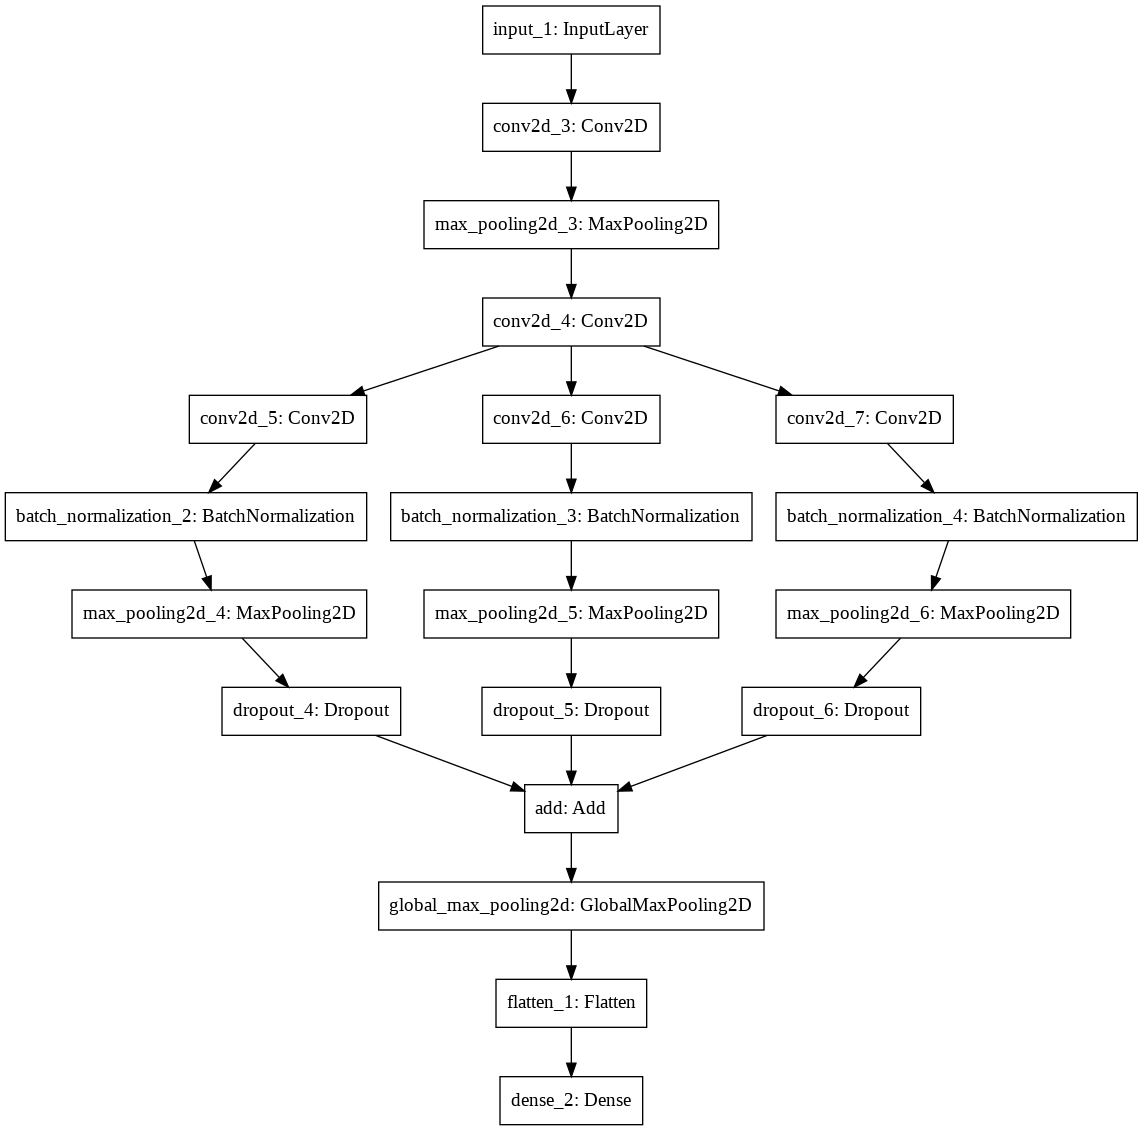

In [42]:
keras.utils.plot_model(second_model)

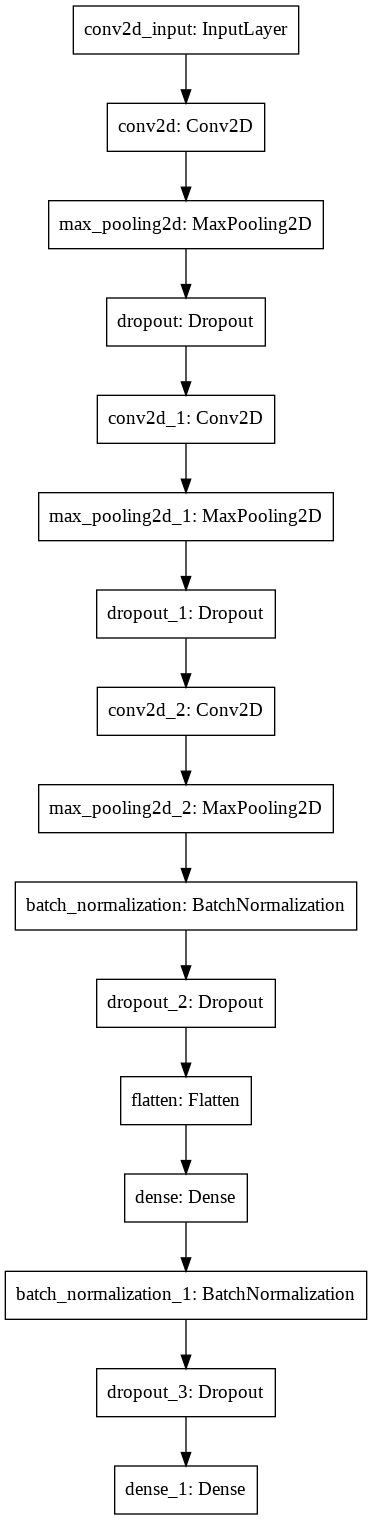

In [43]:
keras.utils.plot_model(first_model)

Summarising first_model and second_model through plot

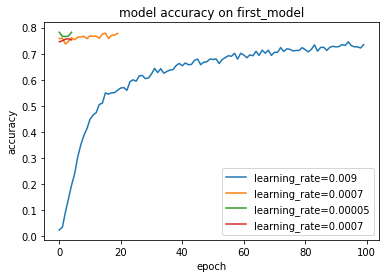

In [46]:
plt.plot(History.history['accuracy'])
plt.plot(History1.history['accuracy'])
plt.plot(History2.history['accuracy'])
plt.plot(History3.history['accuracy'])
plt.title('model accuracy on first_model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['learning_rate=0.009','learning_rate=0.0007','learning_rate=0.00005','learning_rate=0.0007'], loc='lower right')
plt.show()

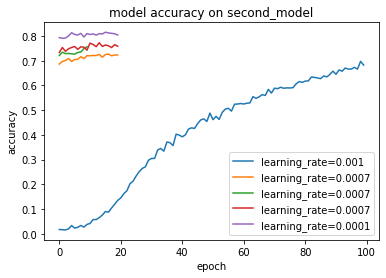

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.title('model accuracy on second_model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['learning_rate=0.001','learning_rate=0.0007','learning_rate=0.0007','learning_rate=0.0007','learning_rate=0.0001'], loc='lower right')
plt.show()

If we look at performance we did pretty descent job, Learning rate is always tricky to choose but standard choices makes this job little easy.   
